KMeans Find K

Student: Michael Menjares

- Your task is to perform customer segmentation using KMeans. 

- We are interested in grouping our customers into groups based on similar characteristics. 

- This can help the company effectively allocate marketing resources. 

- We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data You can download the data [here](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). The original data is from this data source [here](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

1. Use KMeans to create various customer segments.
    - Use an Elbow Plot of inertia
    - And a plot of Silhouette Scores
    - Choose a K based on the results

In [41]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
url = 'https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv'
df_original = pd.read_csv(url)
df = df_original.copy()
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [43]:
drop_cols = ['Unnamed: 0','Customer Id']
df = df.drop(columns = drop_cols)

In [44]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [45]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [46]:
df['Defaulted'].value_counts(dropna=False)

0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'constant',fill_value=2)
imp_df = imputer.fit_transform(df)

In [48]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(imp_df)

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

Text(0, 0.5, 'inertia')

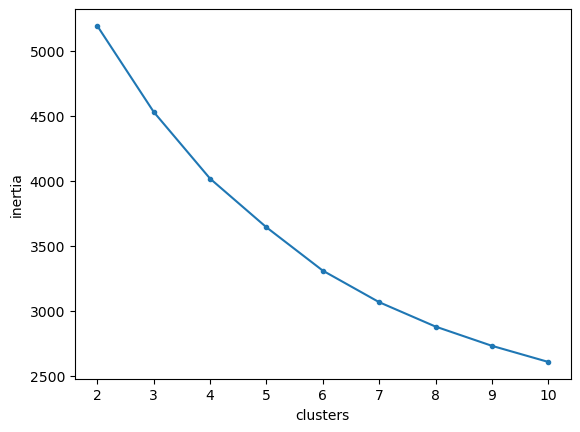

In [32]:
#Create an empty list of inertias
inertias = []

#Loop through k vales between 2 and 10 and store the inertias in the list
for k in range(2,11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(scaled_df)
        inertias.append(kmeans.inertia_)

#Visualize score
plt.plot(range(2,11), inertias, marker= '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

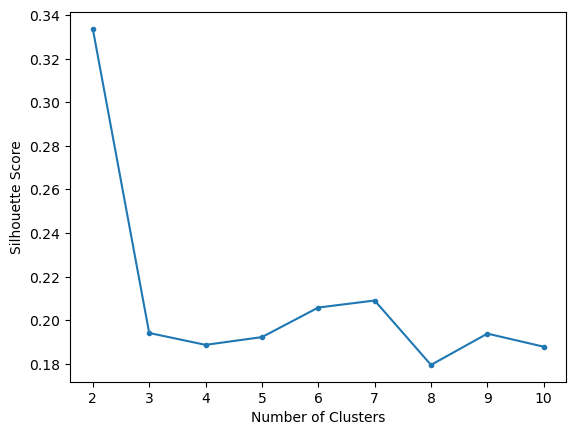

In [35]:
#Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
    
#visualize scores
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [54]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

C:\Users\mmenj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0.3384851475542568

I would choose k to be 2 since it has the highest Silhouette score of .338